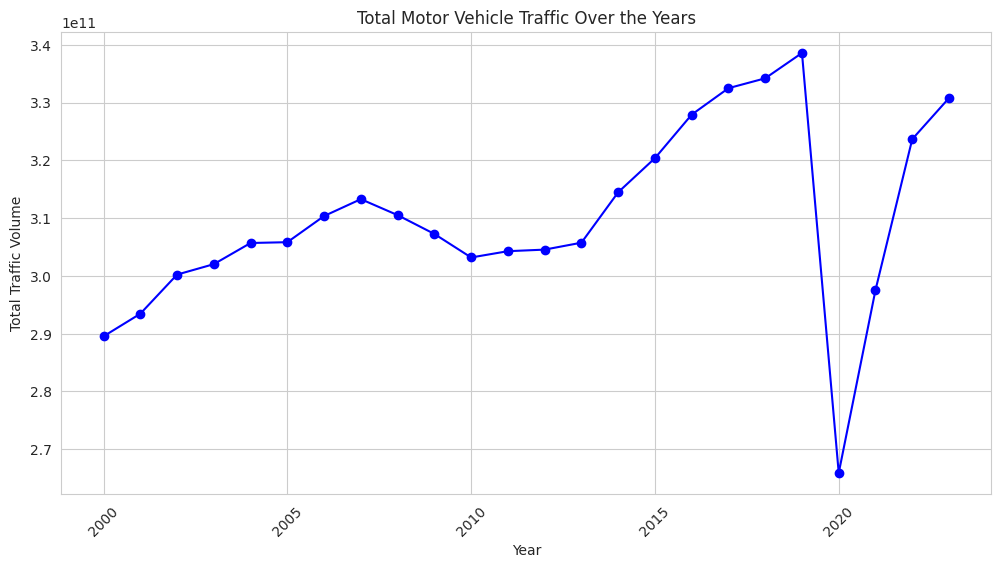

/tmp/ipykernel_65/3915517457.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_traffic.values, y=region_traffic.index, palette="viridis")


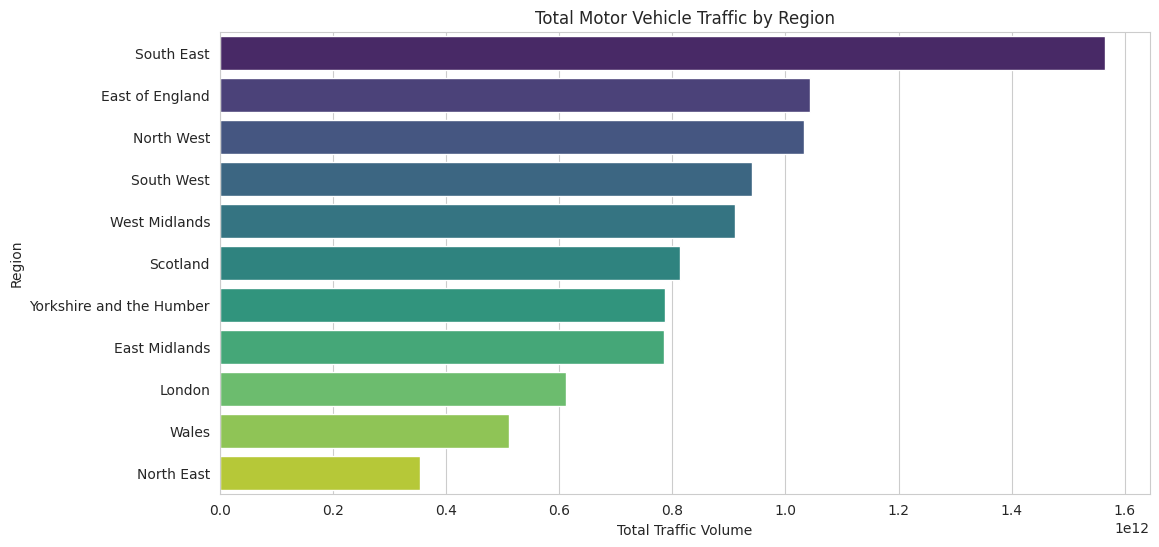

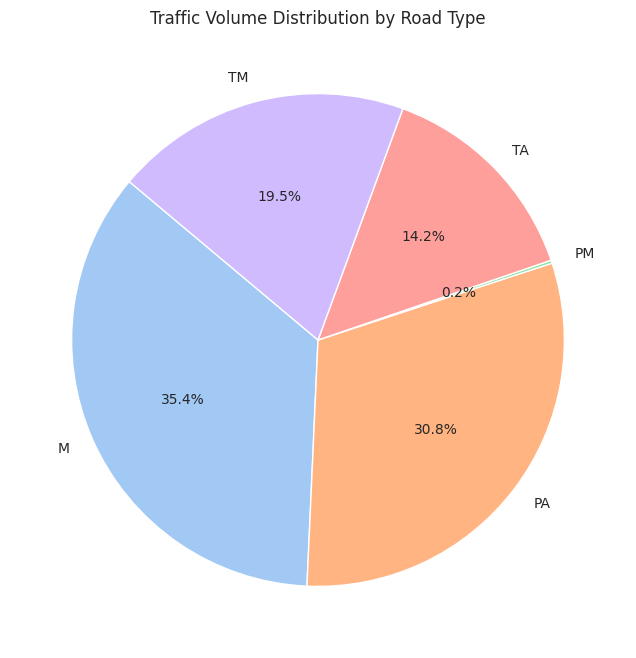

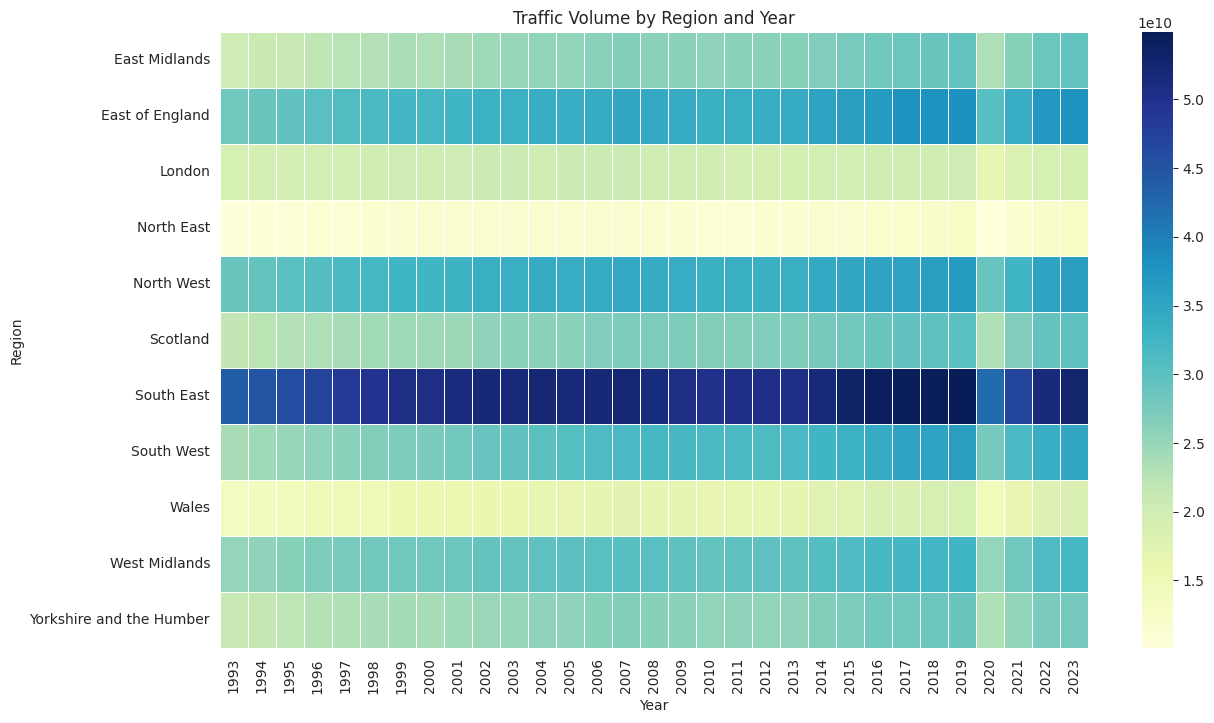

In [2]:
# https://storage.googleapis.com/dft-statistics/road-traffic/downloads/data-gov-uk/region_traffic_by_vehicle_type.csv
# https://storage.googleapis.com/dft-statistics/road-traffic/downloads/data-gov-uk/region_traffic_by_road_type.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
file_path = "region_traffic_by_road_type.csv"
df = pd.read_csv(file_path)

# 总车流量随年的变化
plt.figure(figsize=(12, 6))
yearly_traffic = df.groupby("year")["all_motor_vehicles"].sum()
yearly_traffic = yearly_traffic.loc[2000:2023]
plt.plot(yearly_traffic.index, yearly_traffic.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Traffic Volume")
plt.title("Total Motor Vehicle Traffic Over the Years")
plt.xticks(rotation=45)
plt.show()

# 不同区域车流量
plt.figure(figsize=(12, 6))
region_traffic = df.groupby("region_name")["all_motor_vehicles"].sum().sort_values(ascending=False)
sns.barplot(x=region_traffic.values, y=region_traffic.index, palette="viridis")
plt.xlabel("Total Traffic Volume")
plt.ylabel("Region")
plt.title("Total Motor Vehicle Traffic by Region")
plt.show()

# 不同道路车流量
plt.figure(figsize=(8, 8))
road_traffic = df.groupby("road_category_name")["all_motor_vehicles"].sum()
plt.pie(road_traffic, labels=road_traffic.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Traffic Volume Distribution by Road Type")
plt.show()

# 地区，年份，车流量
plt.figure(figsize=(14, 8))
pivot_table = df.pivot_table(values="all_motor_vehicles", index="region_name", columns="year", aggfunc="sum")
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.xlabel("Year")
plt.ylabel("Region")
plt.title("Traffic Volume by Region and Year")
plt.show()

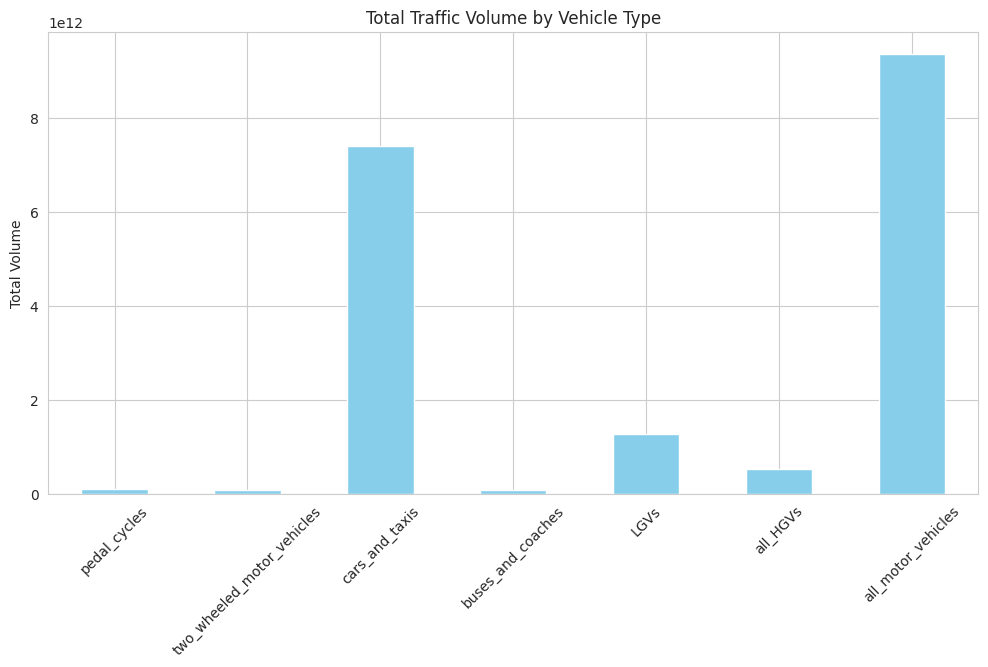

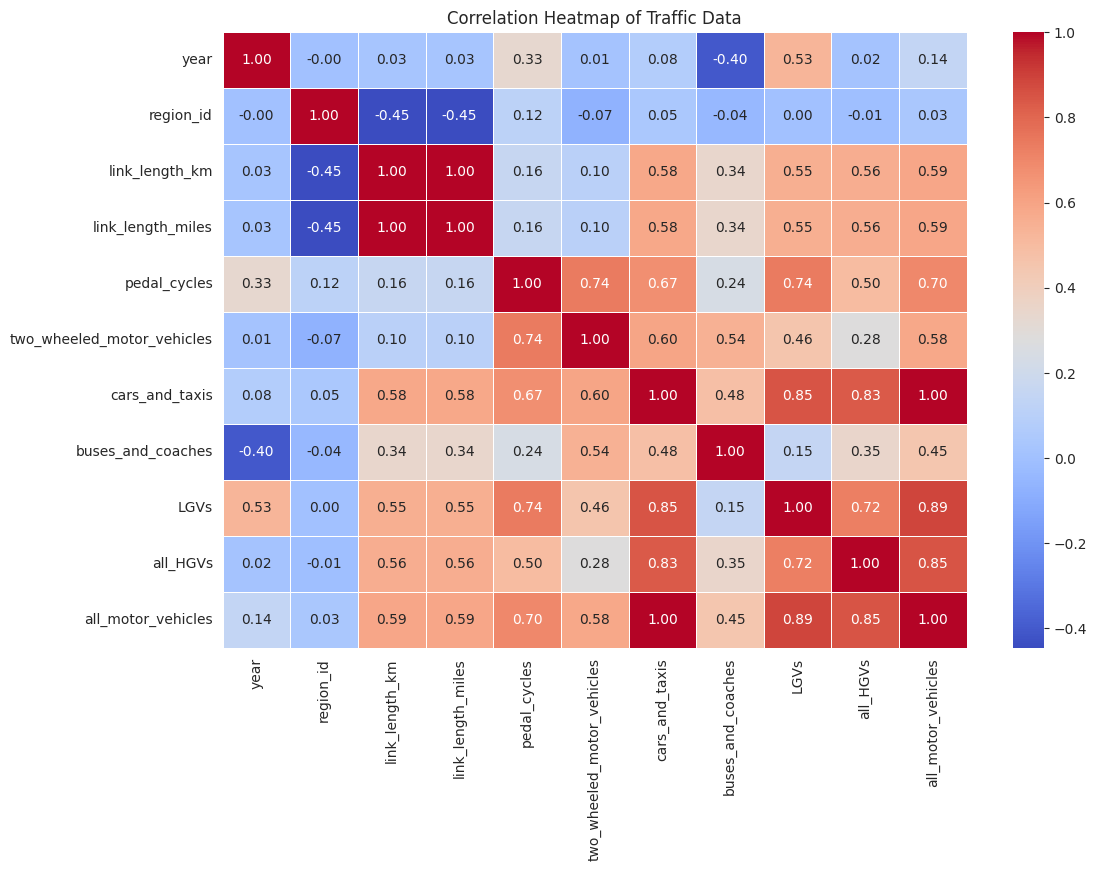

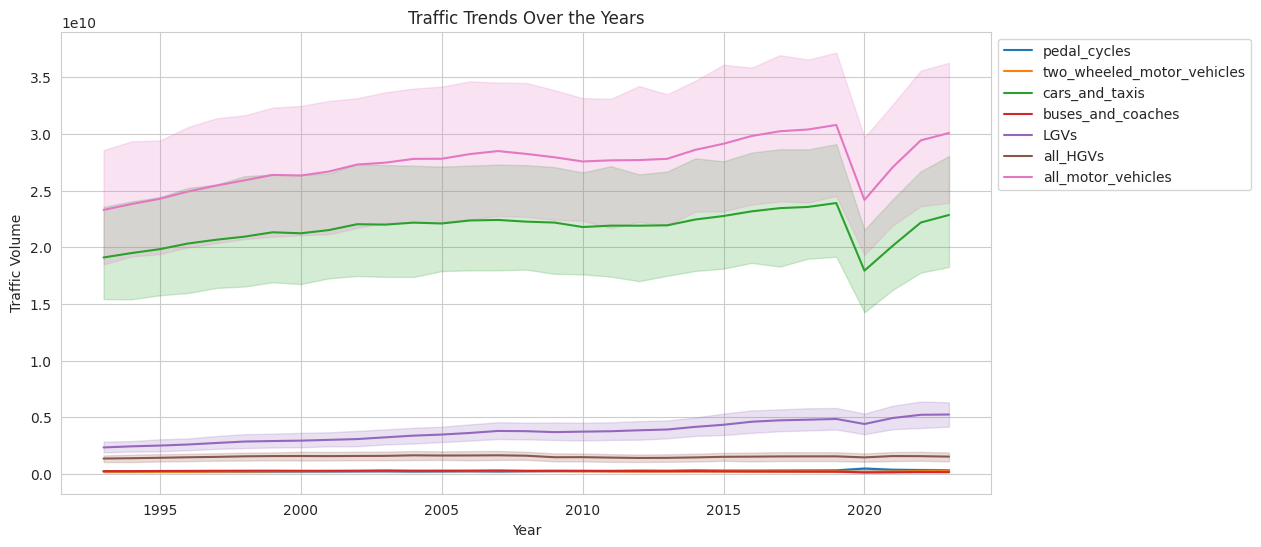

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
file_path = "region_traffic_by_vehicle_type.csv"
df = pd.read_csv(file_path)

# 不同车辆总车流量
plt.figure(figsize=(12, 6))
df.iloc[:, 6:].sum().plot(kind='bar', color='skyblue')
plt.title("Total Traffic Volume by Vehicle Type")
plt.ylabel("Total Volume")
plt.xticks(rotation=45)
plt.show()

# 热力图
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Traffic Data")
plt.show()

# 不同车辆车流量变化
plt.figure(figsize=(12, 6))
for col in df.columns[6:]:
    sns.lineplot(data=df, x="year", y=col, label=col)
plt.title("Traffic Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27f99b72-1f76-4f4f-b7fc-a352bc6666dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>